# First load the modeller package along with the environment to make fake 3d protein structures from primary sequence

In [1]:
from modeller import *

log.verbose()
env = environ()


                         MODELLER 9.16, 2016/01/07, r10745

     PROTEIN STRUCTURE MODELLING BY SATISFACTION OF SPATIAL RESTRAINTS


                     Copyright(c) 1989-2016 Andrej Sali
                            All Rights Reserved

                             Written by A. Sali
                               with help from
              B. Webb, M.S. Madhusudhan, M-Y. Shen, G.Q. Dong,
          M.A. Marti-Renom, N. Eswar, F. Alber, M. Topf, B. Oliva,
             A. Fiser, R. Sanchez, B. Yerkovich, A. Badretdinov,
                     F. Melo, J.P. Overington, E. Feyfant
                 University of California, San Francisco, USA
                    Rockefeller University, New York, USA
                      Harvard University, Cambridge, USA
                   Imperial Cancer Research Fund, London, UK
              Birkbeck College, University of London, London, UK


Kind, OS, HostName, Kernel, Processor: 4, Darwin Nuttapats-iMac.local 15.3.0 x86_64
Date and time of compilat

# Prepare the Input file (the primary sequence) of which you want to create 3d structure

In [2]:
! cat TvLDH.ali

>P1;TvLDH
sequence:TvLDH:::::::0.00: 0.00
MSEAAHVLITGAAGQIGYILSHWIASGELYGDRQVYLHLLDIPPAMNRLTALTMELEDCAFPHLAGFVATTDPKA
AFKDIDCAFLVASMPLKPGQVRADLISSNSVIFKNTGEYLSKWAKPSVKVLVIGNPDNTNCEIAMLHAKNLKPEN
FSSLSMLDQNRAYYEVASKLGVDVKDVHDIIVWGNHGESMVADLTQATFTKEGKTQKVVDVLDHDYVFDTFFKKI
GHRAWDILEHRGFTSAASPTKAAIQHMKAWLFGTAPGEVLSMGIPVPEGNPYGIKPGVVFSFPCNVDKEGKIHVV
EGFKVNDWLREKLDFTEKDLFHEKEIALNHLAQGG*


# Convert the Primary Sequence into profile format

In [4]:
aln = alignment(env)
aln.append(file='TvLDH.ali', alignment_format='PIR', align_codes='ALL')
prf = aln.to_profile()

openf___224_> Open           TvLDH.ali

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       257845     251.802     0.246

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       259295     253.218     0.247

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       262195     256.050     0.250

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       267995     261.714     0.256

Dynamically allocated memory at    amaxsequence [B,KiB,MiB]:       269331     263.019     0.257

Read the alignment from file       : TvLDH.ali
Total number of alignment positions:   335

  #  Code        #_Res #_Segm PDB_code    Name
-------------------------------------------------------------------------------
  1      TvLDH     335      1       TvLDH

Dynamically allocated memory at     amaxprofile [B,KiB,MiB]:       270996     264.645     0.258


# Make Sequence DataBase which will be used to pick up the homologus sequences

In [5]:
sdb = sequence_db(env)
sdb.read(seq_database_file='pdb_95.pir', seq_database_format='PIR',
         chains_list='ALL', minmax_db_seq_len=(30, 4000), clean_sequences=True)

sdb.write(seq_database_file='pdb_95.bin', seq_database_format='BINARY',
          chains_list='ALL')

sdb.read(seq_database_file='pdb_95.bin', seq_database_format='BINARY',
         chains_list='ALL')


openf___224_> Open           pdb_95.pir

Dynamically allocated memory at amaxsequence_db [B,KiB,MiB]:       313945     306.587     0.299

Dynamically allocated memory at amaxsequence_db [B,KiB,MiB]:       901079     879.960     0.859

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       902921     881.759     0.861

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       904371     883.175     0.862

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       907271     886.007     0.865

Dynamically allocated memory at amaxsequence_db [B,KiB,MiB]:      3123070    3049.873     2.978

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:      3128870    3055.537     2.984

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:      3140470    3066.865     2.995

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:      3163670    3089.521     3.017

Dynamically allocated memory at amaxsequence_db [B,KiB,MiB]:      4271570    4171.455 

# Search for homologous sequences then write out the alignment file

In [7]:
prf.build(sdb, matrix_offset=-450, rr_file='${LIB}/blosum62.sim.mat',
          gap_penalties_1d=(-500, -50), n_prof_iterations=1,
          check_profile=False, max_aln_evalue=0.01)
prf.write(file='build_profile.prf', profile_format='TEXT')
aln = prf.to_alignment()
aln.write(file='build_profile.ali', alignment_format='PIR')

openf___224_> Open           ${LIB}/blosum62.sim.mat
rdrrwgh_268_> Number of residue types:       21

Dynamically allocated memory at amaxsequence_db [B,KiB,MiB]:       590333     576.497     0.563
profile_iteration_> processing sequence:       1    335      1     0.0000000     0.0000000     0.0000000     1

Dynamically allocated memory at amaxsequence_db [B,KiB,MiB]:       599630     585.576     0.572
profile_iteration_> processing sequence:    1109    335      1     0.3800000     0.0003427     0.0000016  1109

Dynamically allocated memory at amaxsequence_db [B,KiB,MiB]:       607418     593.182     0.579
profile_iteration_> processing sequence:    2217    335      1     0.7700000     0.0003473     0.0000016  2217
profile_iteration_> processing sequence:    3325    335      1     1.1700000     0.0003519     0.0000016  2842
profile_iteration_> processing sequence:    4433    335      1     1.5500000     0.0003497     0.0000016  2860
profile_iteration_> processing sequence:    5541    3

In [8]:
! ls

TvLDH.ali         build_profile.ali pdb_95.bin
Untitled.ipynb    build_profile.prf pdb_95.pir


# Select a template based on the sequence identity

In [12]:
! cat build_profile.prf

# Number of sequences:     30
# Length of profile  :    335
# N_PROF_ITERATIONS  :      1
# GAP_PENALTIES_1D   :   -500.0   -50.0
# MATRIX_OFFSET      : -450.0
# RR_FILE            : ${LIB}/blosum62.sim.mat
    1 TvLDH                                    S     0   335     1   335     0     0     0    0.    0.0     MSEAAHVLITGAAGQIGYILSHWIASGELYGDRQVYLHLLDIPPAMNRLTALTMELEDCAFPHLAGFVATTDPKAAFKDIDCAFLVASMPLKPGQVRADLISSNSVIFKNTGEYLSKWAKPSVKVLVIGNPDNTNCEIAMLHAKNLKPENFSSLSMLDQNRAYYEVASKLGVDVKDVHDIIVWGNHGESMVADLTQATFTKEGKTQKVVDVLDHDYVFDTFFKKIGHRAWDILEHRGFTSAASPTKAAIQHMKAWLFGTAPGEVLSMGIPVPEGNPYGIKPGVVFSFPCNVDKEGKIHVVEGFKVNDWLREKLDFTEKDLFHEKEIALNHLAQGG
    2 1a5z                                     X     1   312    75   242    63   229   164   28.   0.85E-08 --------------------------------------------------------------------------ADLKGSDVVIVAAGVPQKPGETRLQLLGRNARVMKEIARNVSKYAPDSI-VIVVTNPVDV-LTYFFLKESGMDPRKFGSGTVLDTARLRTLIAQHCGFSPRSVH-VYVIGEHGDSEV-PVWSGAMIGGIPLQNMCQVCQDSKILENFAEKTKRAAYEIIERKGATHY

# From there, we pick the top 2 which have PDB id of (1b8p and 1bdm), the chain A

In [13]:
from modeller import *

env = environ()
aln = alignment(env)
for (pdb, chain) in (('1b8p', 'A'), ('1bdm', 'A')):
    m = model(env, file=pdb, model_segment=('FIRST:'+chain, 'LAST:'+chain))
    aln.append_model(m, atom_files=pdb, align_codes=pdb+chain)
aln.malign()
aln.malign3d()
aln.compare_structures()
aln.id_table(matrix_file='family.mat')
env.dendrogram(matrix_file='family.mat', cluster_cut=-1.0)

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v16}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v16}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1040823    1016.429     0.993

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1041351    1016.944     0.993
openf___224_> Open           ${MODINSTALL9v16}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1089951    1064.405     1.039
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v16}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1103251    1077.394     1.052
openf___224_> Open           $

# Of the two pdb (1b8pA and 1bdmA), 1bdmA has better R-factor and sequence identity. Because of that we will align the primary sequence with the template

In [14]:
! ls

1b8p.pdb          Untitled.ipynb    family.mat
1bdm.pdb          build_profile.ali pdb_95.bin
TvLDH.ali         build_profile.prf pdb_95.pir


In [15]:
from modeller import *

env = environ()
aln = alignment(env)
mdl = model(env, file='1bdm', model_segment=('FIRST:A','LAST:A'))
aln.append_model(mdl, align_codes='1bdmA', atom_files='1bdm.pdb')
aln.append(file='TvLDH.ali', align_codes='TvLDH')
aln.align2d()
aln.write(file='TvLDH-1bdmA.ali', alignment_format='PIR')
aln.write(file='TvLDH-1bdmA.pap', alignment_format='PAP')

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v16}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v16}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      2136178    2086.111     2.037

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      2136706    2086.627     2.038
openf___224_> Open           ${MODINSTALL9v16}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      2185306    2134.088     2.084
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v16}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      2198606    2147.076     2.097
openf___224_> Open           $

In [16]:
! ls

1b8p.pdb          TvLDH-1bdmA.pap   build_profile.ali pdb_95.bin
1bdm.pdb          TvLDH.ali         build_profile.prf pdb_95.pir
TvLDH-1bdmA.ali   Untitled.ipynb    family.mat


# Let us look at the alignment of the primary sequence and template

In [18]:
! cat TvLDH-1bdmA.pap

 _aln.pos         10        20        30        40        50        60
1bdmA     MKAPVRVAVTGAAGQIGYSLLFRIAAGEMLGKDQPVILQLLEIPQAMKALEGVVMELEDCAFPLLAGL 
TvLDH     MSEAAHVLITGAAGQIGYILSHWIASGELYG-DRQVYLHLLDIPPAMNRLTALTMELEDCAFPHLAGF 
 _consrvd *     *  ********* *   ** **  * *  * * ** ** **  *    ********* ***

 _aln.p   70        80        90       100       110       120       130
1bdmA     EATDDPDVAFKDADYALLVGAAPRL--QV-------NGKIFTEQGRALAEVAKKDVKVLVVGNPANTN 
TvLDH     VATTDPKAAFKDIDCAFLVASMPLKPGQVRADLISSNSVIFKNTGEYLSKWAKPSVKVLVIGNPDNTN 
 _consrvd  ** **  **** * * **   *    **       *  **   *  *   **  ***** *** ***

 _aln.pos  140       150       160       170       180       190       200
1bdmA     ALIAYKNAPGLNPRNFTAMTRLDHNRAKAQLAKKTGTGVDRIRRMTVWGNHSSIMFPDLFHAEV--DG 
TvLDH     CEIAMLHAKNLKPENFSSLSMLDQNRAYYEVASKLGVDVKDVHDIIVWGNHGESMVADLTQATFTKEG 
 _consrvd   **   *  * * **     ** ***    * * *  *       *****   *  **  *     *

 _aln.pos    210       220       230       240       250      

# Let us create 3d structure from primary amino acid sequence 

In [19]:
from modeller import *
from modeller.automodel import *
#from modeller import soap_protein_od

env = environ()
a = automodel(env, alnfile='TvLDH-1bdmA.ali',
              knowns='1bdmA', sequence='TvLDH',
              assess_methods=(assess.DOPE,
                              #soap_protein_od.Scorer(),
                              assess.GA341))
a.starting_model = 1
a.ending_model = 5
a.make()

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v16}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v16}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      2619046    2557.662     2.498

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      2619574    2558.178     2.498
openf___224_> Open           ${MODINSTALL9v16}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      2668174    2605.639     2.545
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v16}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      2681474    2618.627     2.557
openf___224_> Open           $

# Out from 5 fake model, TvLDH.B99990001.pdb has highest assessment scores with highest GA341 score.

In [20]:
from modeller import *
from modeller.scripts import complete_pdb

log.verbose()    
env = environ()
env.libs.topology.read(file='$(LIB)/top_heav.lib') # read topology
env.libs.parameters.read(file='$(LIB)/par.lib') # read parameters

# read model file
mdl = complete_pdb(env, 'TvLDH.B99990001.pdb')

# Assess with DOPE:
s = selection(mdl)   # all atom selection
s.assess_dope(output='ENERGY_PROFILE NO_REPORT', file='TvLDH.profile',
              normalize_profile=True, smoothing_window=15)

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v16}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v16}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     21447325   20944.652    20.454

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     21447853   20945.168    20.454
openf___224_> Open           ${MODINSTALL9v16}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     21496453   20992.629    20.501
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v16}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     21509753   21005.617    20.513
openf___224_> Open           $

-37275.98046875

In [21]:
! ls

1b8p.pdb            TvLDH.B99990005.pdb TvLDH.V99990003     Untitled.ipynb
1bdm.pdb            TvLDH.D00000001     TvLDH.V99990004     build_profile.ali
TvLDH-1bdmA.ali     TvLDH.D00000002     TvLDH.V99990005     build_profile.prf
TvLDH-1bdmA.pap     TvLDH.D00000003     TvLDH.ali           family.mat
TvLDH.B99990001.pdb TvLDH.D00000004     TvLDH.ini           pdb_95.bin
TvLDH.B99990002.pdb TvLDH.D00000005     TvLDH.profile       pdb_95.pir
TvLDH.B99990003.pdb TvLDH.V99990001     TvLDH.rsr
TvLDH.B99990004.pdb TvLDH.V99990002     TvLDH.sch


# Visualize the results 3d Protein

In [22]:
import nglview
view = nglview.show_structure_file('TvLDH.B99990001.pdb')

In [23]:
view

In [24]:
view.render_image()

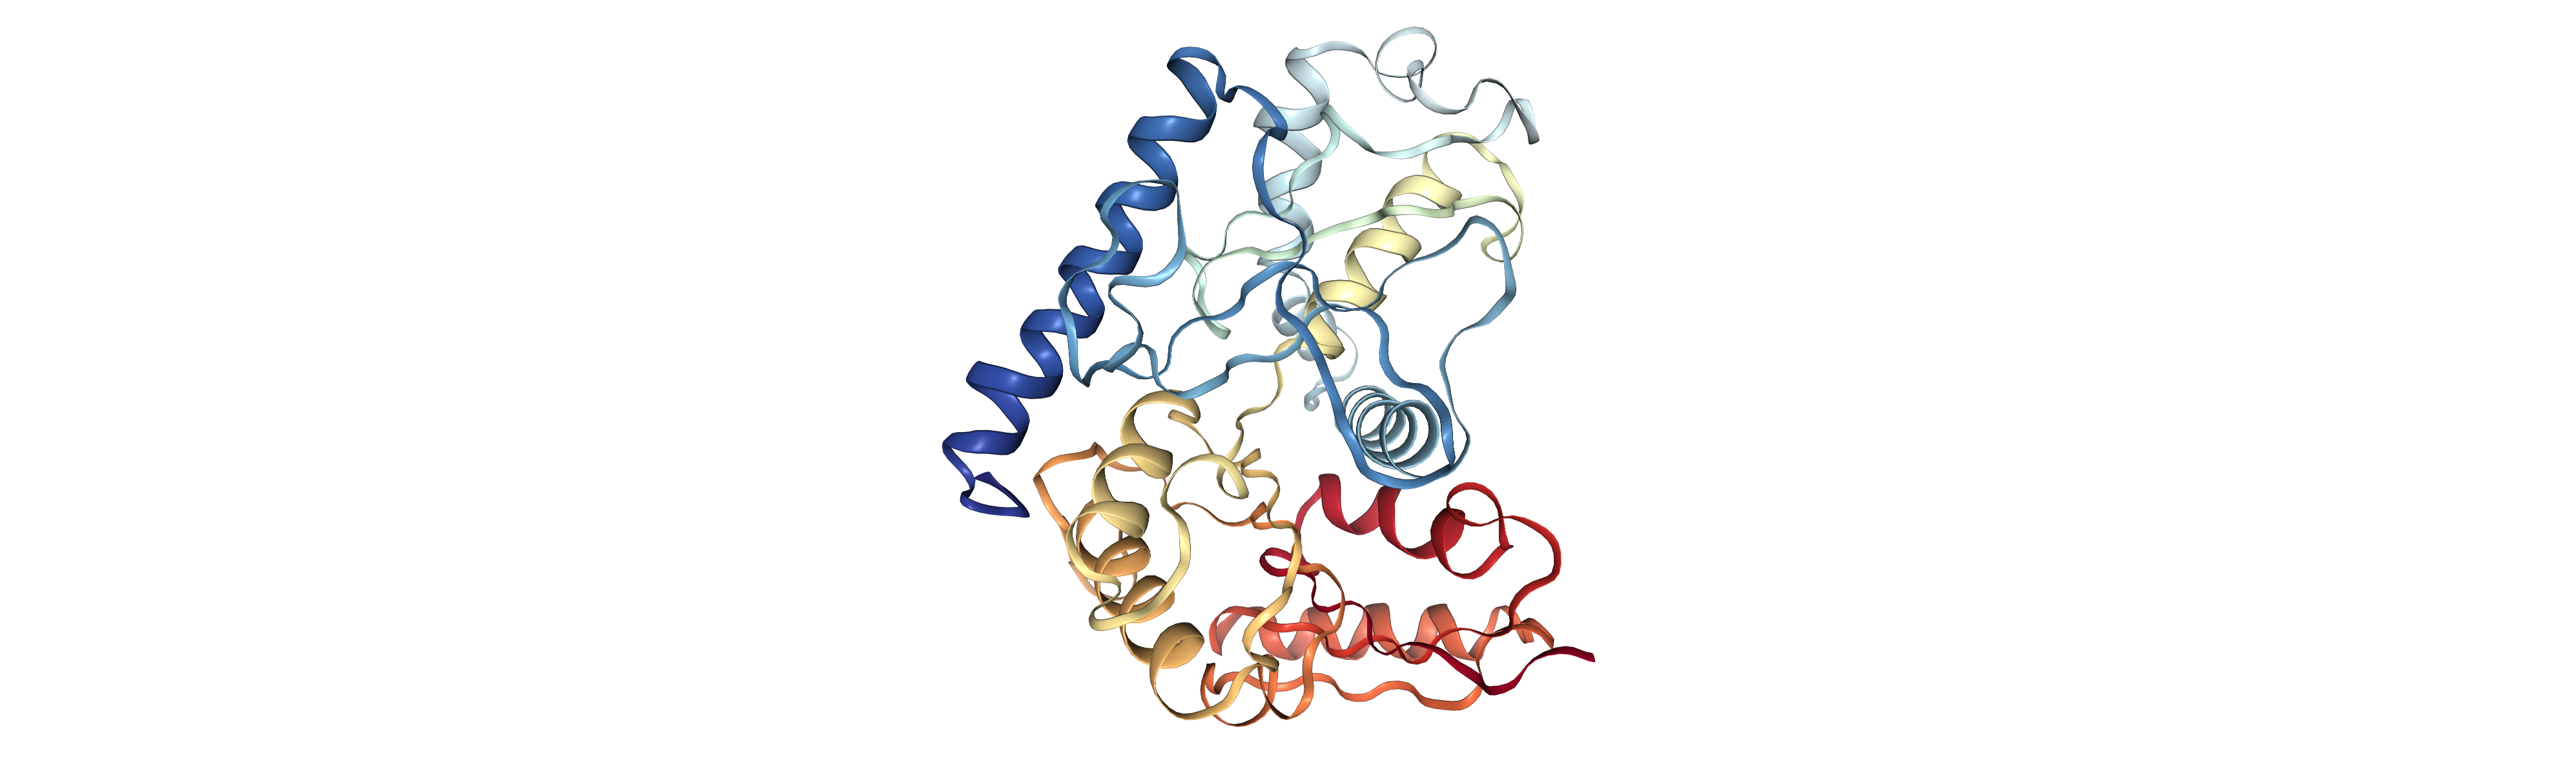

In [25]:
view._display_image()